In [1]:
#importing the necessary libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go

# Project Title: Fraud Detection in Financial Transactions
## Project Goal: To develop a machine learning model that can accurately identify fraudulent financial transactions in real-time.

Data Dictionary

The below column reference:

• step: represents a unit of time where 1 step equals 1
hour

• type: type of online transaction

• amount: the amount of the transaction

• nameOrig: customer starting the transaction

• oldbalanceOrg: balance before the transaction

• newbalanceOrig: balance after the transaction

• nameDest: recipient of the transaction

• oldbalanceDest: initial balance of recipient
before the transaction

• newbalanceDest: the new balance of the
recipient after the transaction

• isFraud: fraud transaction

In [2]:
# importing the fraud dataset 
df = pd.read_csv("/Users/hayyatkash/Downloads/Online Payment Fraud Detection.csv")
#reviewing the top 10 data rows of the dataset 
df.head(10)

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0            0.00        0  
1  M2044282225             0.0            0.00        0  
2   C553264065             0.0            0.00        1  
3    C38997010         21182.0            0.00        1  
4  M1230701703             0.0            0.00        0  
5   M573487274             0.0            0.00        0  
6   M408069119             0.0            0.00        0  
7   M633326333             0.0            0.00        0  
8  M1176932104             0.0            0.00        0  
9   C195600860         41898.0        40348.79        0

# Data Pre-processing:
The data will be cleaned, transformed, and encoded to make it suitable for building a machine learning model. This will include removing missing values, handling outliers, and transforming categorical variables into numerical ones.

In [3]:
#Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [4]:
#data segmentation and droping of irrelevant features
df = df.drop(columns=['nameOrig','nameDest'],axis=1)
df.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0        0  
1             0.0        0  
2             0.0        1  
3             0.0        1  
4             0.0        0

In [5]:
# the amount of rows(1048575) and column(8)
df.shape

(1048575, 8)

In [6]:
#checking for missing data 
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [7]:
#Getting data stats 
df.describe().round(3)

step        amount  oldbalanceOrg  newbalanceOrig  \
count  1048575.000  1.048575e+06   1.048575e+06    1.048575e+06   
mean        26.966  1.586670e+05   8.740095e+05    8.938089e+05   
std         15.623  2.649409e+05   2.971751e+06    3.008271e+06   
min          1.000  1.000000e-01   0.000000e+00    0.000000e+00   
25%         15.000  1.214907e+04   0.000000e+00    0.000000e+00   
50%         20.000  7.634333e+04   1.600200e+04    0.000000e+00   
75%         39.000  2.137619e+05   1.366420e+05    1.746000e+05   
max         95.000  1.000000e+07   3.890000e+07    3.890000e+07   

       oldbalanceDest  newbalanceDest      isFraud  
count    1.048575e+06    1.048575e+06  1048575.000  
mean     9.781600e+05    1.114198e+06        0.001  
std      2.296780e+06    2.416593e+06        0.033  
min      0.000000e+00    0.000000e+00        0.000  
25%      0.000000e+00    0.000000e+00        0.000  
50%      1.263772e+05    2.182604e+05        0.000  
75%      9.159235e+05    1.149808e+06        0.000  
max      4.210000e+07    4.220000e+07        1.000

In [8]:
# count of fraud and no fraud 
df['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [9]:
# Here I am checking the correlation with all the Numeric column in the dataset Vs Label(isFraud)
correlation = df.corr()
print(correlation["isFraud"].sort_values(ascending=False).round(3 ))

isFraud           1.000
amount            0.129
step              0.045
oldbalanceOrg     0.004
newbalanceDest   -0.000
oldbalanceDest   -0.008
newbalanceOrig   -0.009
Name: isFraud, dtype: float64


In [10]:
# Create a function that will label 'Fraud' column properly


def Fruad(x):
    '''Return fraud or none fruad'''
    if x == 0:
        return 'None Fraud'
    else:
        return 'Fraud'
    
df['Fraud'] = df['isFraud'].apply(Fruad)
df.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud       Fraud  
0             0.0        0  None Fraud  
1             0.0        0  None Fraud  
2             0.0        1       Fraud  
3             0.0        1       Fraud  
4             0.0        0  None Fraud

# Exploratory Data Analysis (EDA):
The data will be analyzed to understand the distribution of transactions, identify any patterns, and check for any anomalies. This analysis will help in understanding the characteristics of fraudulent transactions and develop an appropriate model.

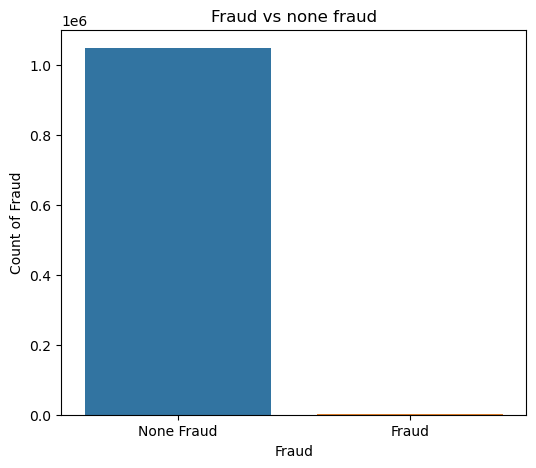

In [11]:
# Create a visual(chart) that shows the distribution of Fraud and no Fraud

plt.figure(figsize=(6,5))
plt.title('Fraud vs none fraud')
sns.countplot(data=df, x='Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count of Fraud')
plt.show()


#  features VS Label

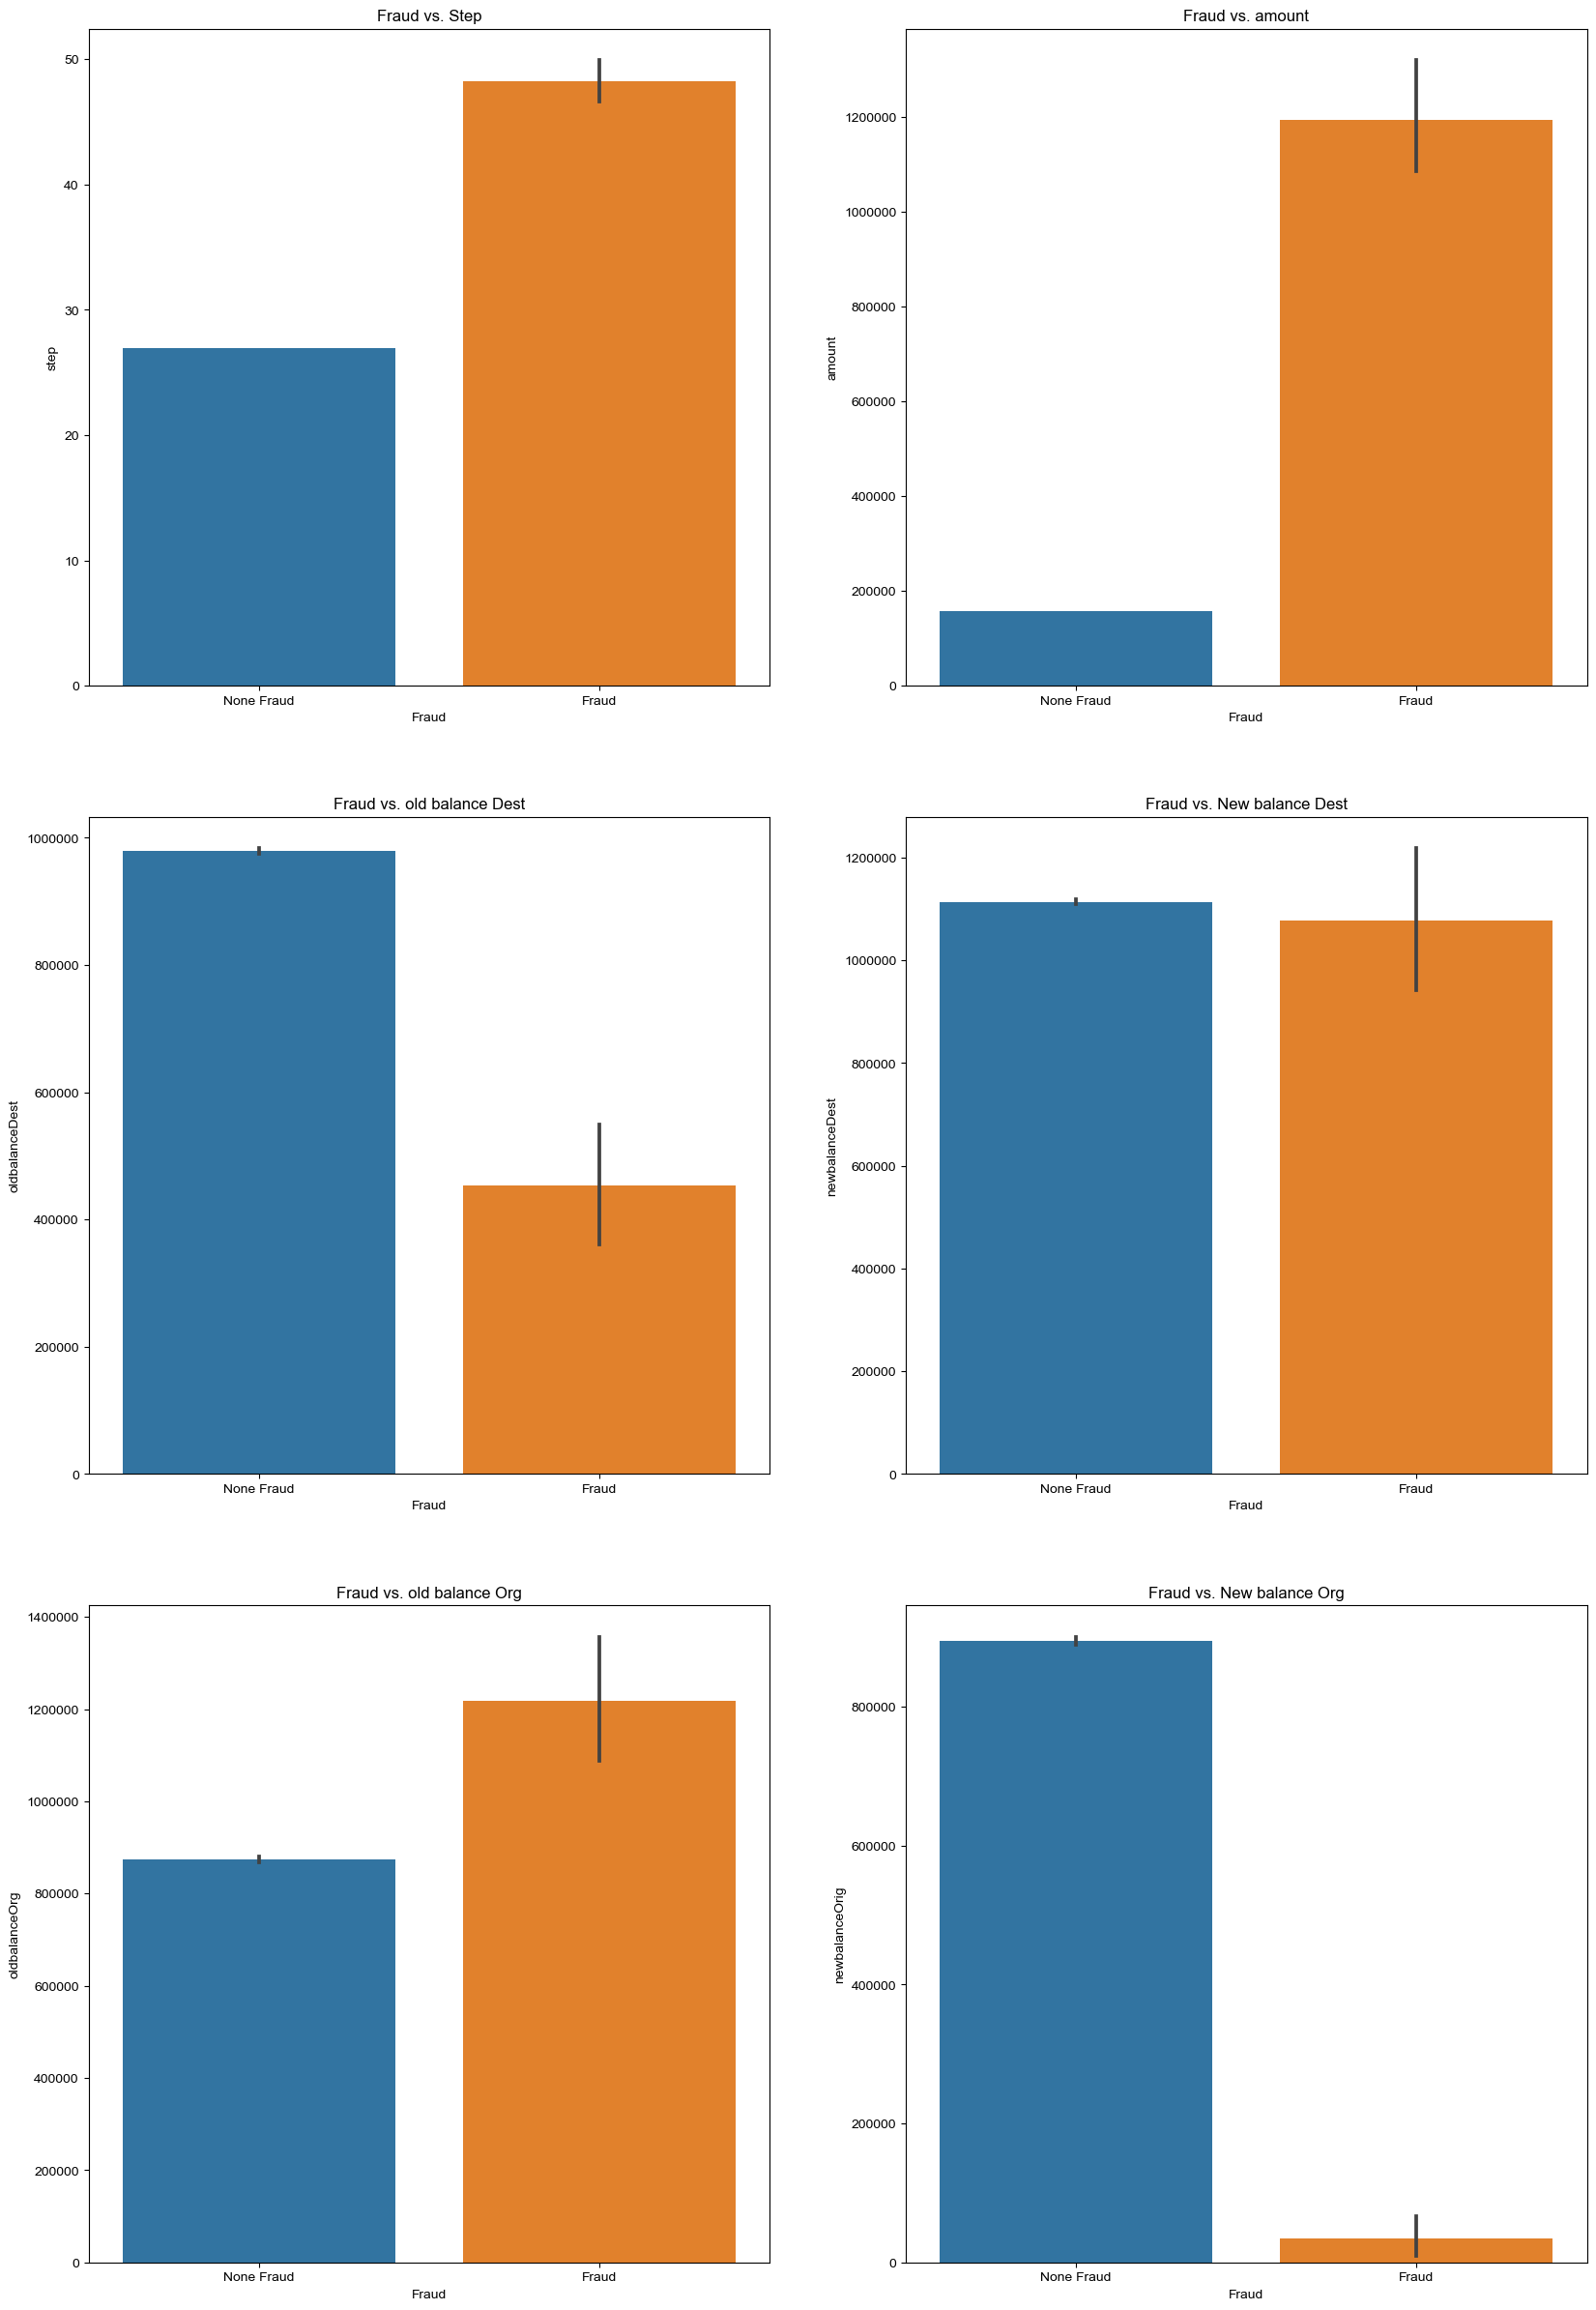

In [12]:
# Use subplots to visualize the other features


fig, axes = plt.subplots(3,2, figsize=(20,30))

# features VS Label
# plot on each subplot
sns.barplot(data=df, x='Fraud', y='step',ax=axes[0,0])
sns.barplot(data=df, x='Fraud', y='amount', ax=axes[0,1])
sns.barplot(data=df, x='Fraud', y='oldbalanceDest',ax=axes[1,0])
sns.barplot(data=df, x='Fraud', y='newbalanceDest',ax=axes[1,1])
sns.barplot(data=df, x='Fraud', y='oldbalanceOrg',ax=axes[2,0])
sns.barplot(data=df, x='Fraud', y='newbalanceOrig',ax=axes[2,1])

axes[0,0].set_title('Fraud vs. Step')
axes[0,1].set_title('Fraud vs. amount')
axes[1,0].set_title('Fraud vs. old balance Dest')
axes[1,1].set_title('Fraud vs. New balance Dest')
axes[2,0].set_title('Fraud vs. old balance Org')
axes[2,1].set_title('Fraud vs. New balance Org')
axes[0,0].set_xlabel('Fraud')
axes[0,0].set_ylabel('step')
axes[0,1].set_xlabel('Fraud')
axes[0,1].set_ylabel('amount')
axes[1,0].set_xlabel('Fraud')
axes[1,0].set_ylabel('oldbalanceDest')
axes[1,1].set_xlabel('Fraud')
axes[1,1].set_ylabel('newbalanceDest')
axes[2,0].set_xlabel('Fraud')
axes[2,0].set_ylabel('oldbalanceOrg')
axes[2,1].set_xlabel('Fraud')
axes[2,1].set_ylabel('newbalanceOrig')

# set tick label format to plain decimal notation for each subplot
sns.set_style('ticks')
for ax in axes.flat:
    ax.ticklabel_format(style='plain',axis='y')


plt.show()





# comparing numeric values 

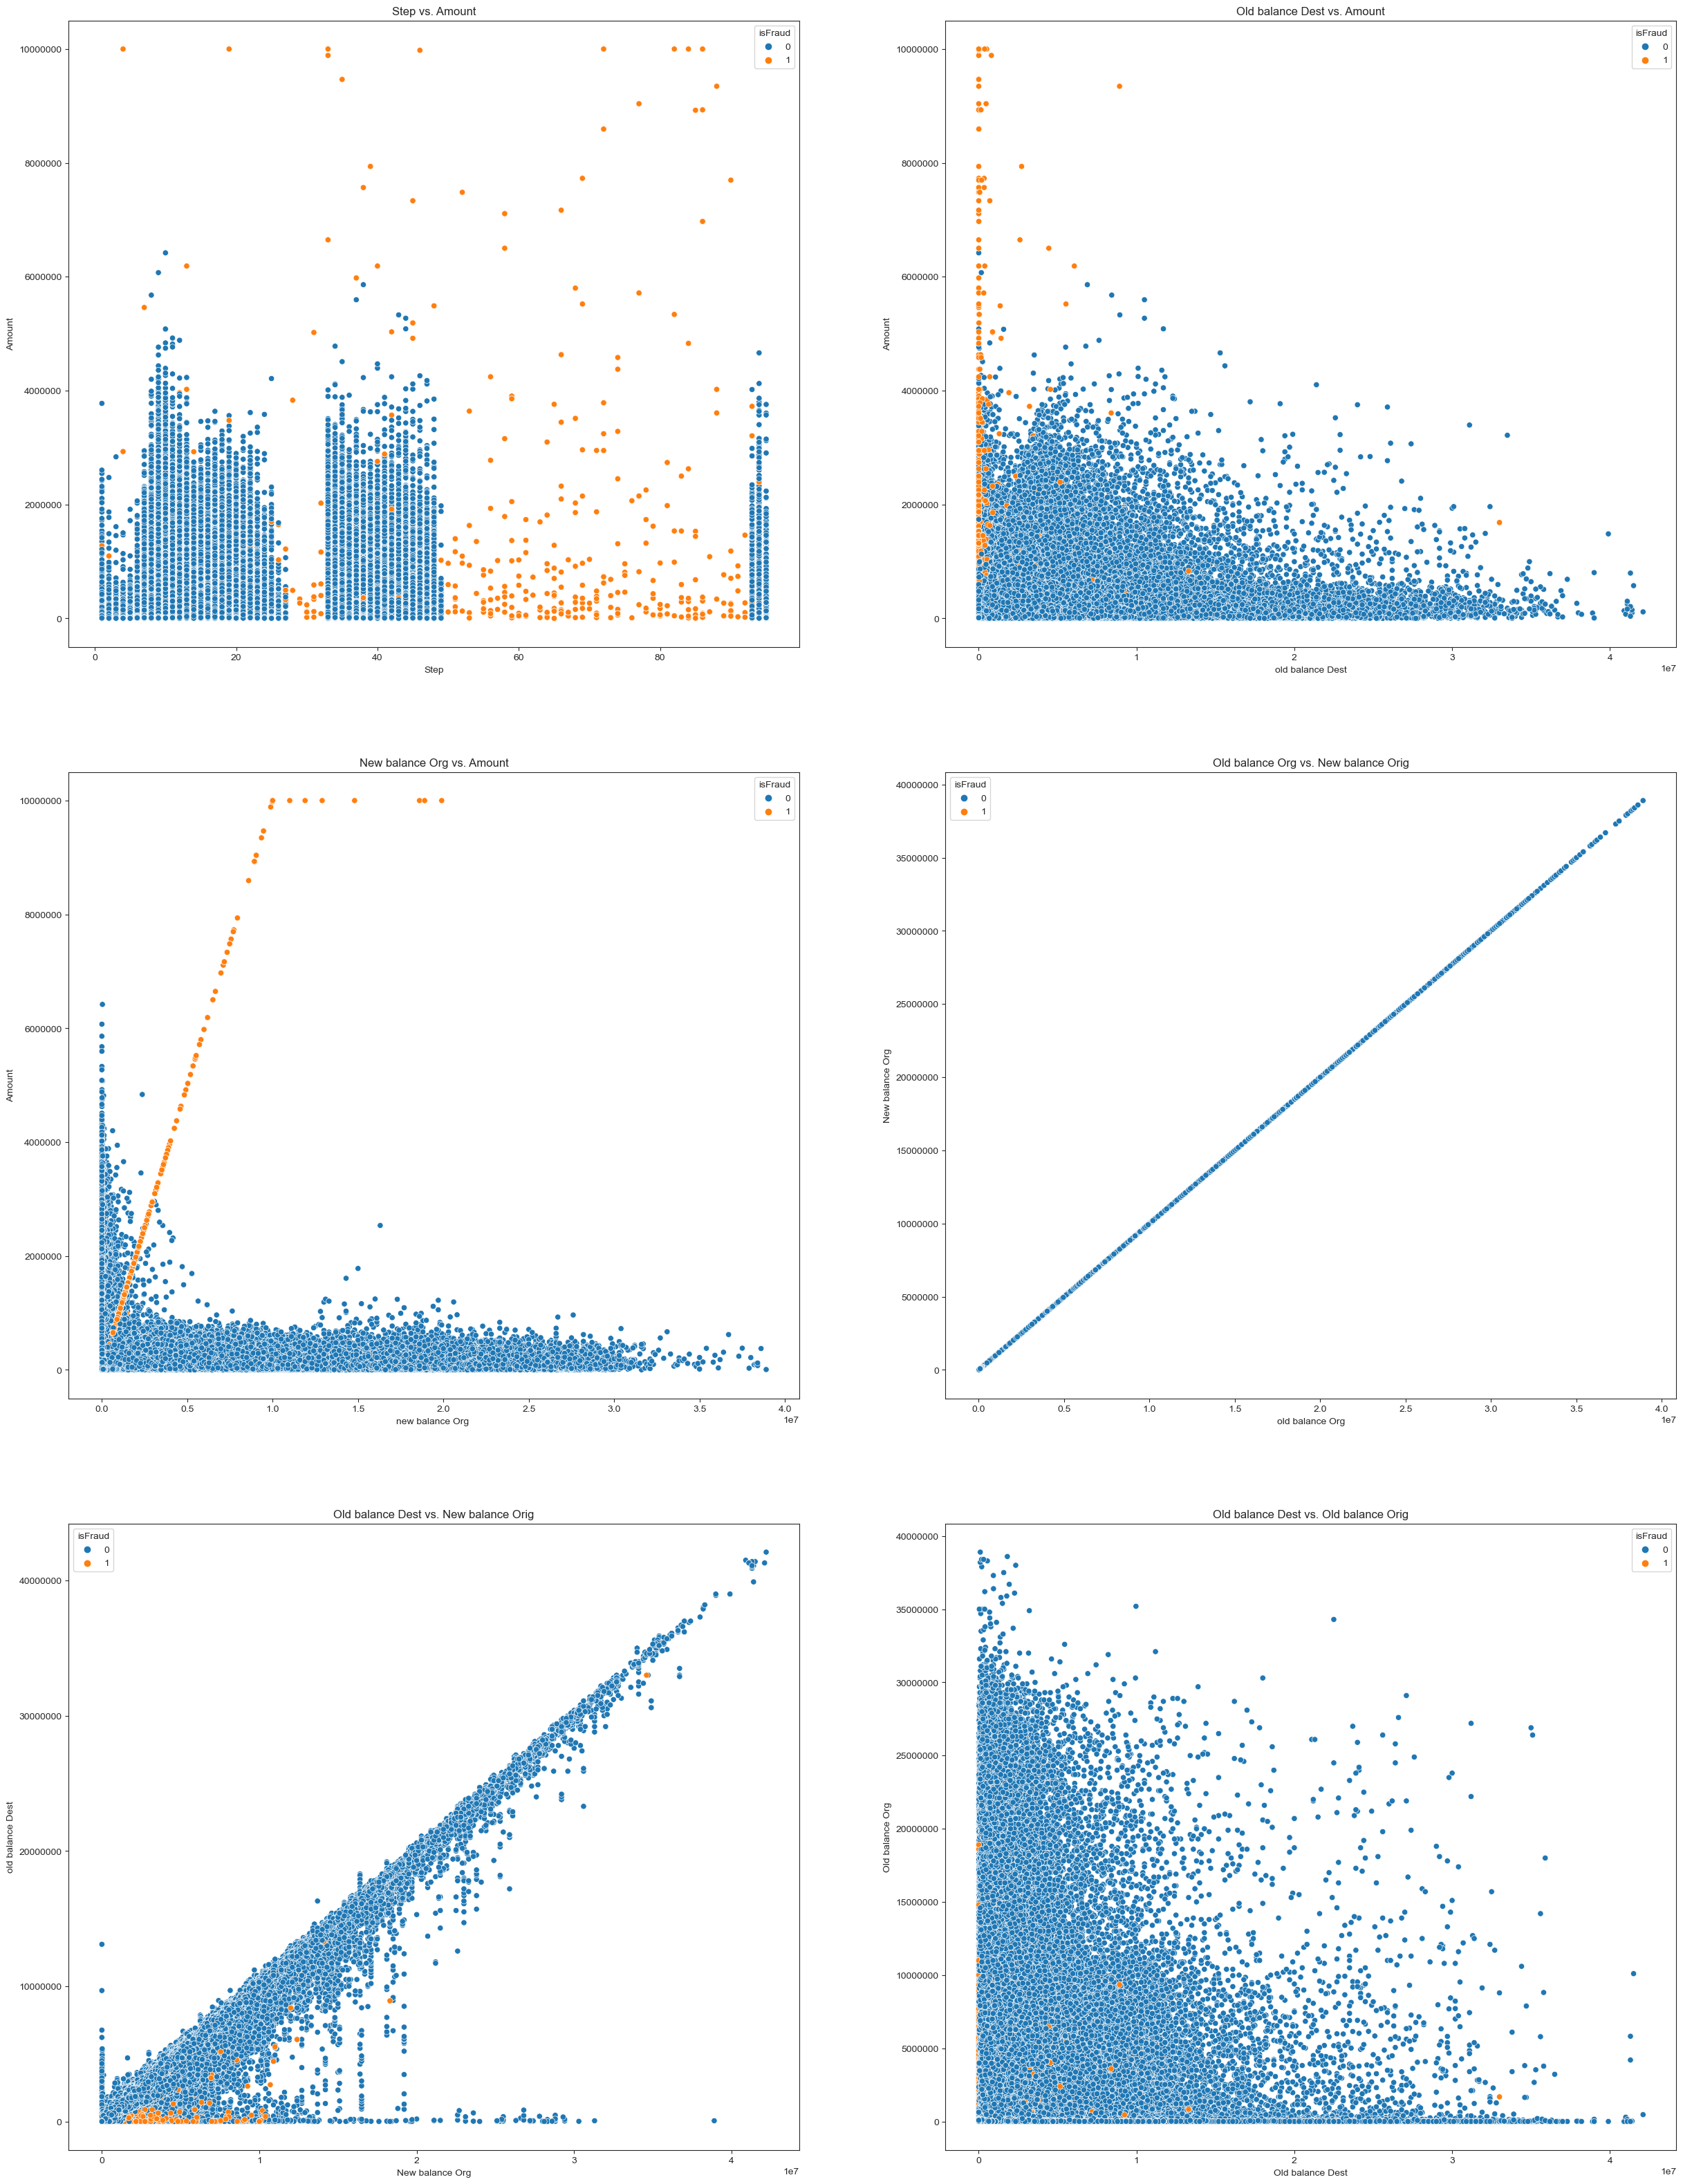

In [13]:
# Use subplots to visualize the other features


fig, axes = plt.subplots(3,2, figsize=(30,40))

# plot on each subplot
sns.scatterplot(data=df, x='step', y='amount',hue="isFraud",ax=axes[0,0])
sns.scatterplot(data=df, x='oldbalanceDest', y='amount',hue="isFraud", ax=axes[0,1])
sns.scatterplot(data=df, x='oldbalanceOrg', y='amount',hue="isFraud",ax=axes[1,0])
sns.scatterplot(data=df, x='oldbalanceOrg', y='oldbalanceOrg',hue="isFraud",ax=axes[1,1])
sns.scatterplot(data=df, x='newbalanceDest', y='oldbalanceDest',hue="isFraud",ax=axes[2,0])
sns.scatterplot(data=df, x='oldbalanceDest', y='oldbalanceOrg',hue="isFraud",ax=axes[2,1])

axes[0,0].set_title('Step vs. Amount')
axes[0,1].set_title('Old balance Dest vs. Amount')
axes[1,0].set_title('New balance Org vs. Amount')
axes[1,1].set_title('Old balance Org vs. New balance Orig')
axes[2,0].set_title('Old balance Dest vs. New balance Orig')
axes[2,1].set_title('Old balance Dest vs. Old balance Orig')
axes[0,0].set_xlabel('Step')
axes[0,0].set_ylabel('Amount')
axes[0,1].set_xlabel('old balance Dest')
axes[0,1].set_ylabel('Amount')
axes[1,0].set_xlabel('new balance Org ')
axes[1,0].set_ylabel('Amount')
axes[1,1].set_xlabel('old balance Org')
axes[1,1].set_ylabel('New balance Org')
axes[2,0].set_xlabel('New balance Org')
axes[2,0].set_ylabel('old balance Dest')
axes[2,1].set_xlabel('Old balance Dest')
axes[2,1].set_ylabel('Old balance Org')


# set tick label format to plain decimal notation for each subplot
sns.set_style('ticks')
for ax in axes.flat:
    ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [14]:
df['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

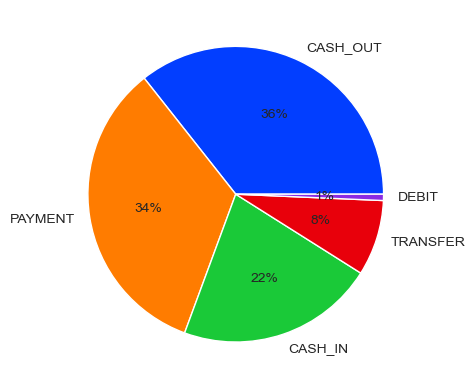

In [15]:
#define data
data = df['type'].value_counts()
labels = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='type', ylabel='amount'>

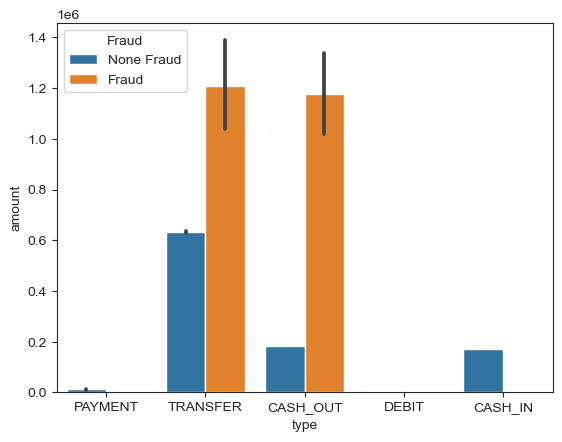

In [16]:
sns.barplot(data=df, x="type", y='amount',hue='Fraud')

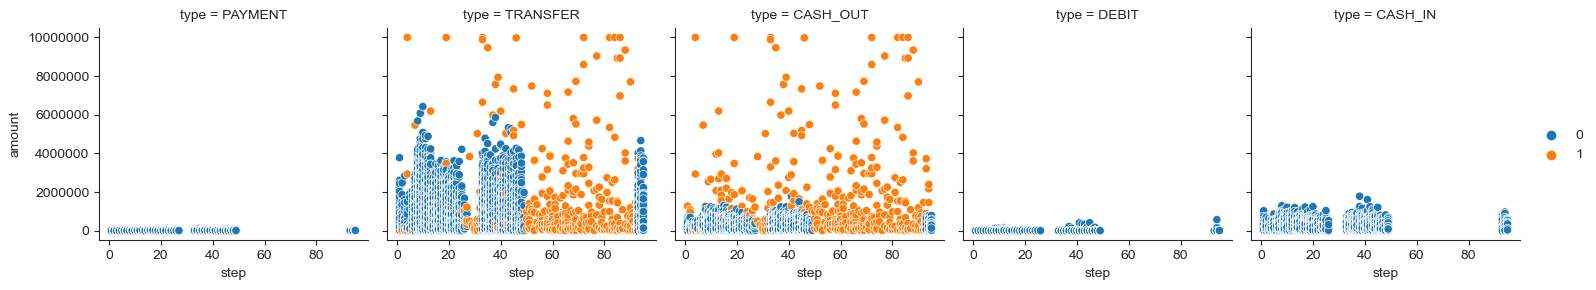

In [17]:
g = sns.FacetGrid(df, col="type")
g.map_dataframe(sns.scatterplot, x="step", y="amount", hue="isFraud")
# set tick label format to plain decimal notation for each subplot
sns.set_style('ticks')
g.add_legend()
for ax in g.axes.flat:
    ax.ticklabel_format(style='plain', axis='both')
plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

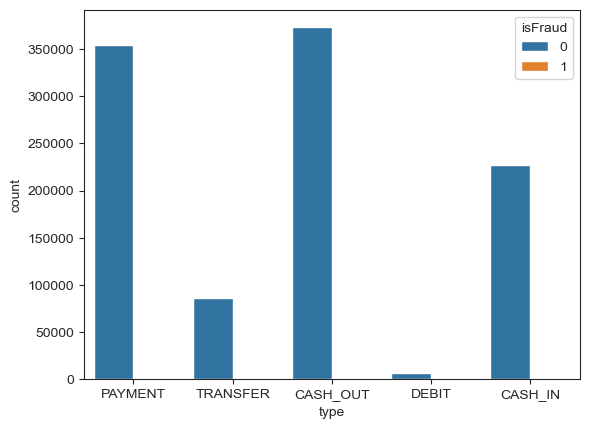

In [18]:
sns.countplot(data=df, x="type", hue="isFraud")

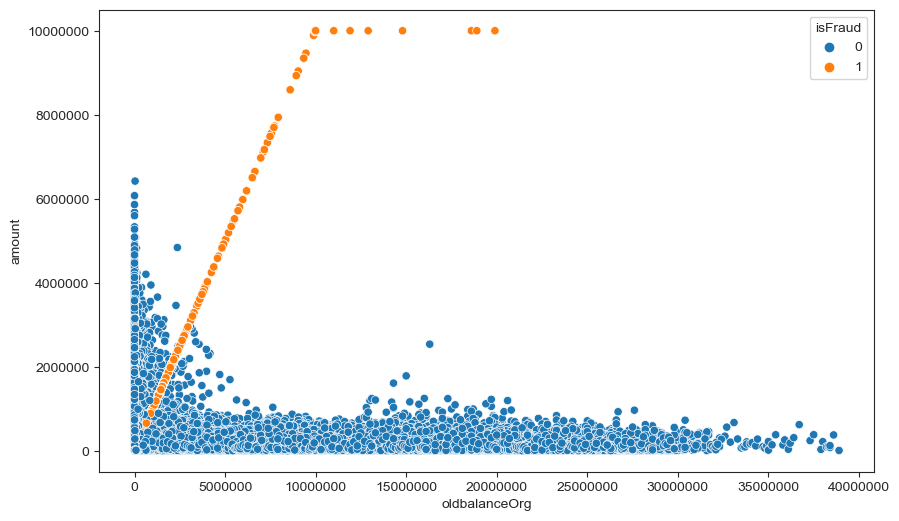

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="oldbalanceOrg", y="amount", hue="isFraud")
plt.ticklabel_format(style='plain')

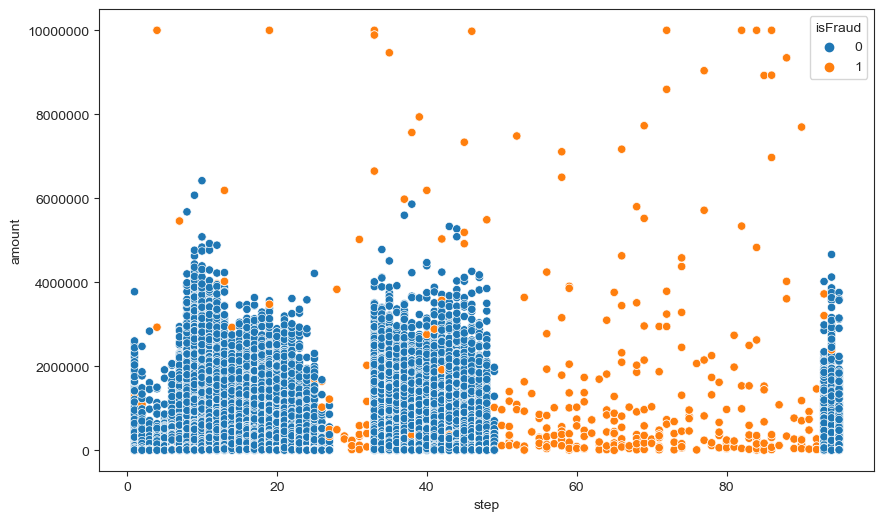

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="step", y="amount", hue="isFraud")
plt.ticklabel_format(style='plain')



In [21]:
df['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='isFraud'>

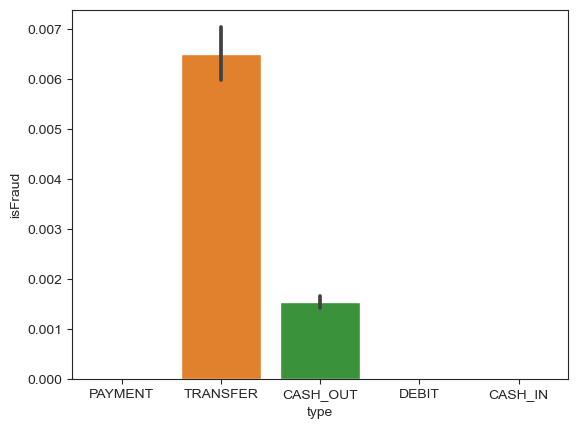

In [22]:
sns.barplot(data=df, x="type", y="isFraud")

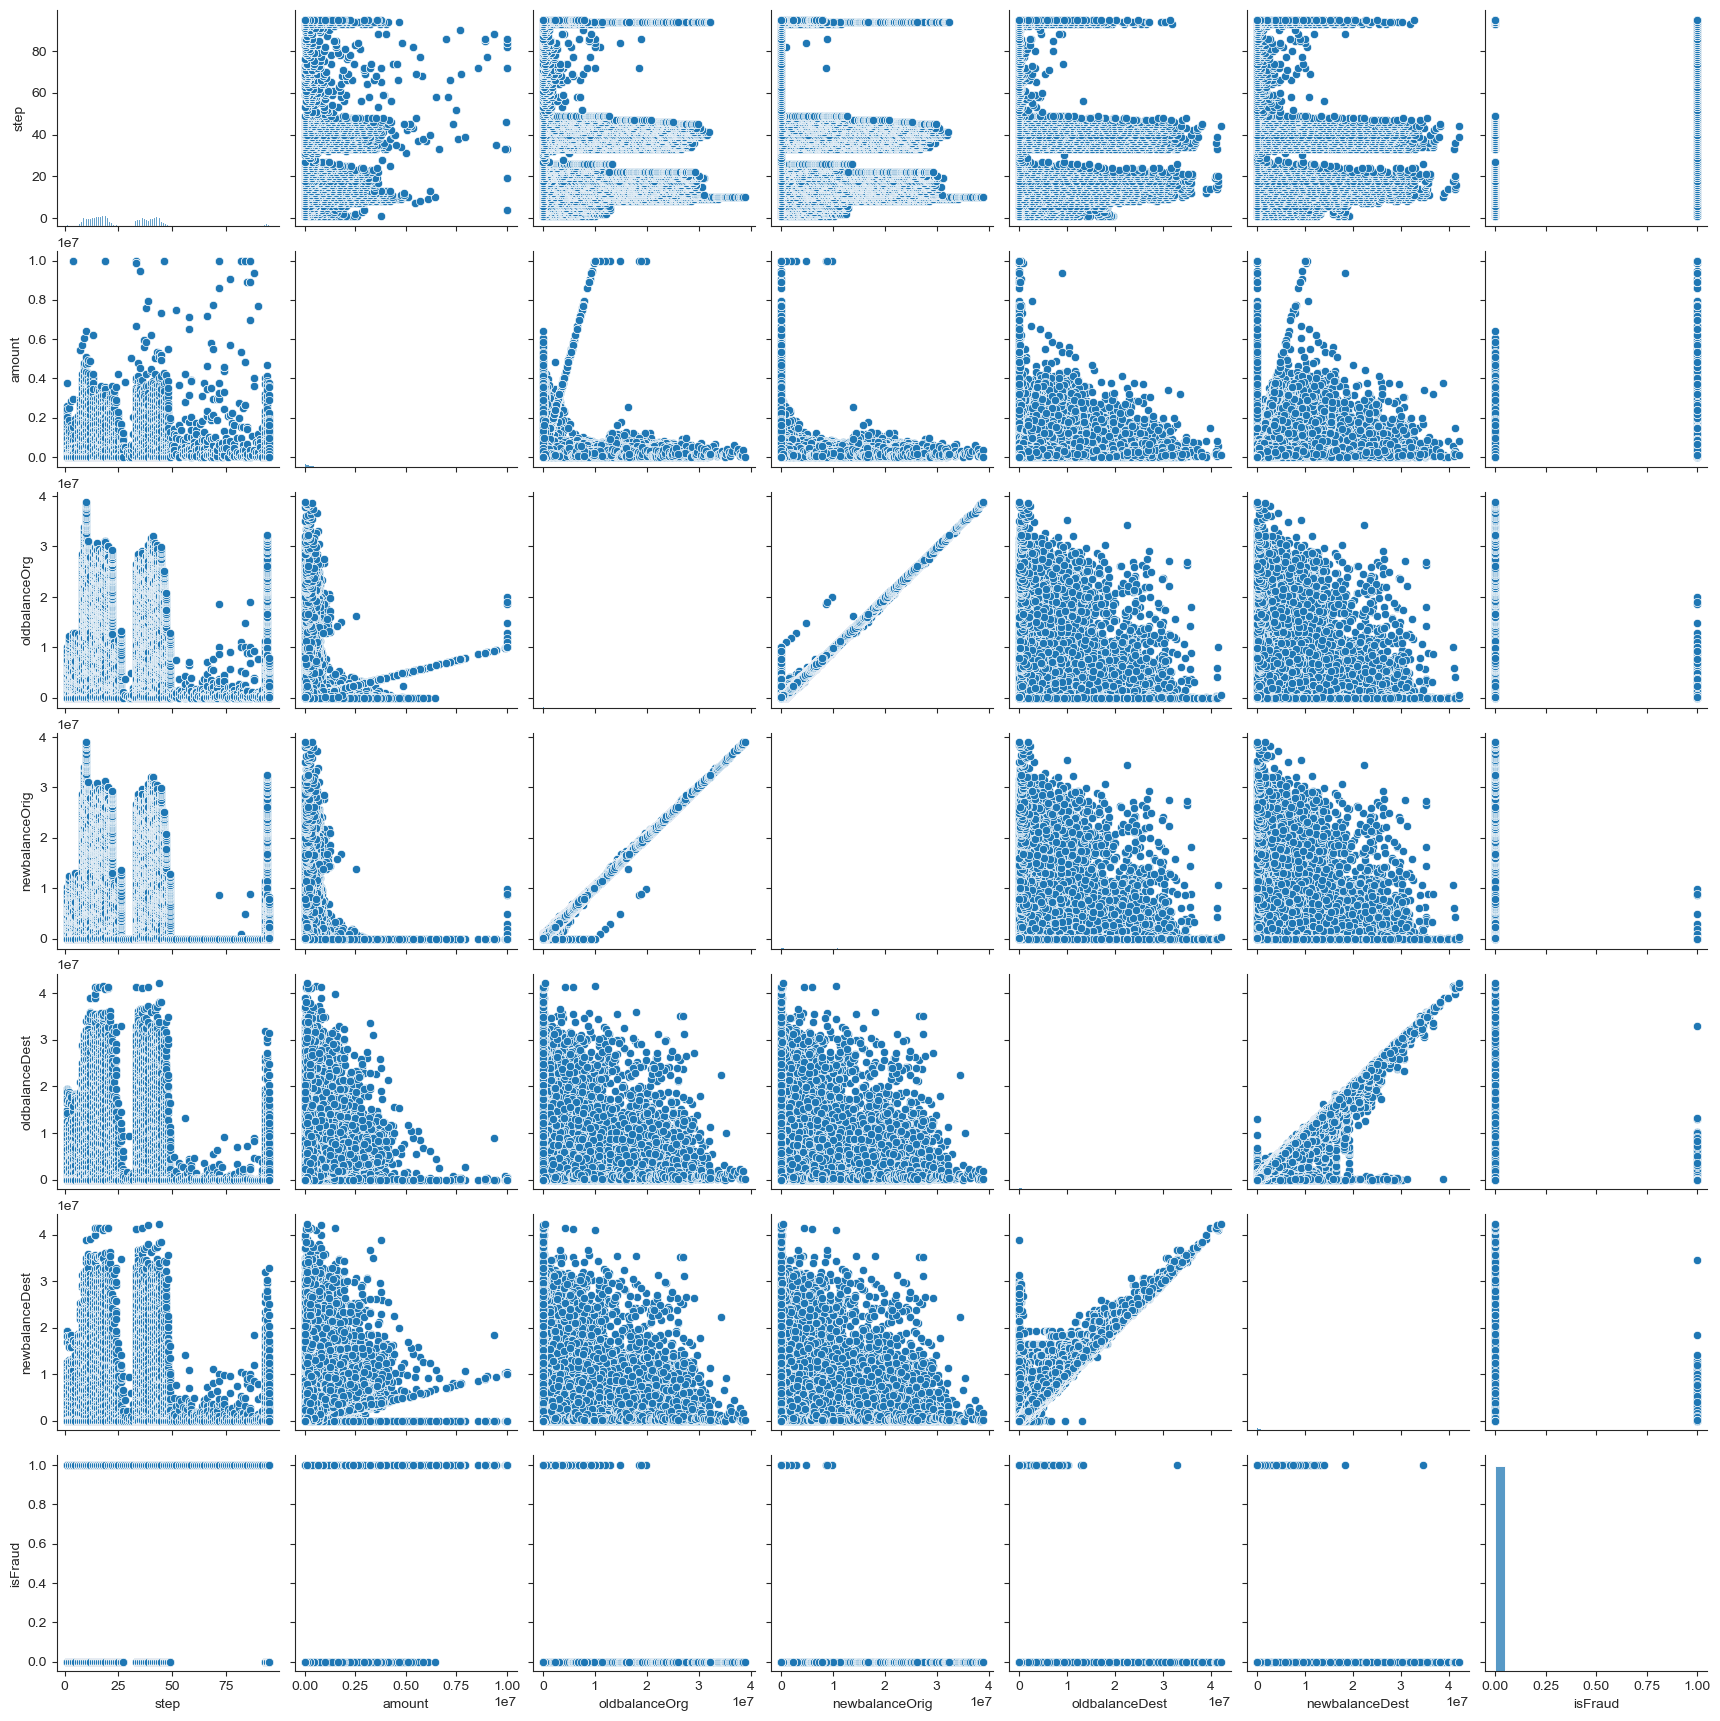

In [23]:
#quickly checking all the numeric features
sns.pairplot(df)

# Feature Engineering: 
The data will be processed to extract relevant features that will be used to build a predictive model. This may include aggregating transaction data by customer, creating new variables based on the transaction amount, step, balance and transaction type.


In [24]:
#one hot encoding using the dummies method - use to convert the dataset to numerbal 
df = pd.get_dummies(df)
df

step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1    9839.64      170136.00       160296.36            0.00   
1           1    1864.28       21249.00        19384.72            0.00   
2           1     181.00         181.00            0.00            0.00   
3           1     181.00         181.00            0.00        21182.00   
4           1   11668.14       41554.00        29885.86            0.00   
...       ...        ...            ...             ...             ...   
1048570    95  132557.35      479803.00       347245.65       484329.37   
1048571    95    9917.36       90545.00        80627.64            0.00   
1048572    95   14140.05       20545.00         6404.95            0.00   
1048573    95   10020.05       90605.00        80584.95            0.00   
1048574    95   11450.03       80584.95        69134.92            0.00   

         newbalanceDest  isFraud  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
0                  0.00        0             0              0           0   
1                  0.00        0             0              0           0   
2                  0.00        1             0              0           0   
3                  0.00        1             0              1           0   
4                  0.00        0             0              0           0   
...                 ...      ...           ...            ...         ...   
1048570       616886.72        0             0              1           0   
1048571            0.00        0             0              0           0   
1048572            0.00        0             0              0           0   
1048573            0.00        0             0              0           0   
1048574            0.00        0             0              0           0   

         type_PAYMENT  type_TRANSFER  Fraud_Fraud  Fraud_None Fraud  
0                   1              0            0                 1  
1                   1              0            0                 1  
2                   0              1            1                 0  
3                   0              0            1                 0  
4                   1              0            0                 1  
...               ...            ...          ...               ...  
1048570             0              0            0                 1  
1048571             1              0            0                 1  
1048572             1              0            0                 1  
1048573             1              0            0                 1  
1048574             1              0            0                 1  

[1048575 rows x 14 columns]

In [25]:
# Separate features and labels
features = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']
label = 'isFraud'
X, y = df[features].values, df[label].values
for n in range(0,6):
    print("customer", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

customer 1 
  Features: [1.0, 9839.64, 170136.0, 160296.36, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] 
  Label: 0
customer 2 
  Features: [1.0, 1864.28, 21249.0, 19384.72, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] 
  Label: 0
customer 3 
  Features: [1.0, 181.0, 181.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 
  Label: 1
customer 4 
  Features: [1.0, 181.0, 181.0, 0.0, 21182.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0] 
  Label: 1
customer 5 
  Features: [1.0, 11668.14, 41554.0, 29885.86, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] 
  Label: 0
customer 6 
  Features: [1.0, 7817.71, 53860.0, 46042.29, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] 
  Label: 0


In [26]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 734002
Test cases: 314573


# Using LogisticRegression to train my dataset 
Model Selection: The machine learning models will be selected based on the performance of the model in identifying fraudulent transactions. The models that will be considered include Logistic Regression, Decision Trees

In [27]:
from sklearn.linear_model import LogisticRegression
# Fitting my data
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

# Model Training and Evaluation: 
The models will be trained on the pre-processed data, and the performance will be evaluated using metrics such as accuracy, precision, recall, and F1 score. The model with the highest performance will be selected as the final model.



In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Predict the target variable on test data
y_pred = clf.predict(X_test)

In [29]:
# Predict the target variable on test data
y_pred = clf.predict(X_test)

In [30]:

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[314157     83]
 [   210    123]]


In [31]:
from sklearn.metrics import accuracy_score
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy.round(4))

Accuracy: 0.9991


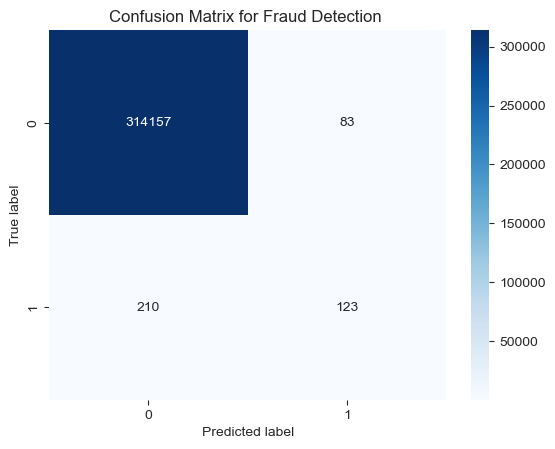

In [32]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Fraud Detection ')
plt.show()

In [33]:
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314240
           1       0.60      0.37      0.46       333

    accuracy                           1.00    314573
   macro avg       0.80      0.68      0.73    314573
weighted avg       1.00      1.00      1.00    314573



In [34]:
# Calculate the accuracy of the model
accuracy = clf.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))
# Calculate the error of the model
error = 1 - accuracy
print("Error: {:.2f}%".format(error * 100))

Accuracy: 99.91%
Error: 0.09%


In [52]:
# prediction
#features = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']]
features = np.array([[35.0, 9.64, 170136.0, 160296.36, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0] ])
print(clf.predict(features))

[0]


# Using decisionTree to train my data 

In [36]:
from sklearn import tree
from sklearn.model_selection import train_test_split


In [60]:
features = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']
label = 'isFraud'
X, y = df[features].values, df[label].values

In [61]:
# Split the data into training and testing sets 80% training and 20% testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print("Data shape:")
print("train", X_train.shape)
print("test", y_test.shape)


Data shape:
train (838860, 11)
test (209715,)


In [54]:
# Train a decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(0.9286230720767906, 0.9833333333333333, 'X[1] <= 4901972.5\ngini = 0.002\nsamples = 838860\nvalue = [837955, 905]'),
 Text(0.8662714149117039, 0.95, 'X[0] <= 49.5\ngini = 0.002\nsamples = 838786\nvalue = [837947, 839]'),
 Text(0.7523984254912779, 0.9166666666666666, 'X[1] <= 3475827.5\ngini = 0.001\nsamples = 824241\nvalue = [823815, 426]'),
 Text(0.7030707679500648, 0.8833333333333333, 'X[10] <= 0.5\ngini = 0.001\nsamples = 824102\nvalue = [823687, 415]'),
 Text(0.6152457777773861, 0.85, 'X[1] <= 1345927.625\ngini = 0.001\nsamples = 756154\nvalue = [755939, 215]'),
 Text(0.5479219622560356, 0.8166666666666667, 'X[1] <= 986323.156\ngini = 0.001\nsamples = 756125\nvalue = [755935, 190]'),
 Text(0.4277147644263312, 0.7833333333333333, 'X[1] <= 781932.969\ngini = 0.0\nsamples = 756057\nvalue = [755879, 178]'),
 Text(0.21257112688966606, 0.75, 'X[0] <= 6.5\ngini = 0.0\nsamples = 755669\nvalue = [755499, 170]'),
 Text(0.030685920577617327, 0.7166666666666667, 'X[7] <= 0.5\ngini = 0.00

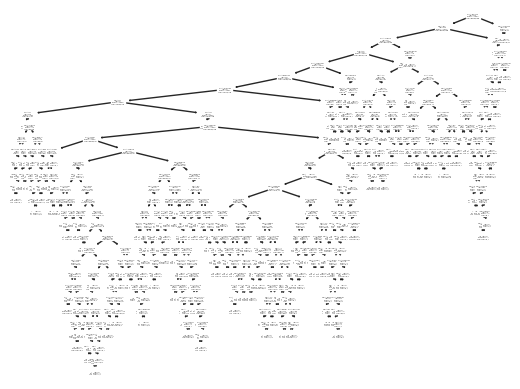

In [55]:
#Graph for the decision tree
tree.plot_tree(clf)

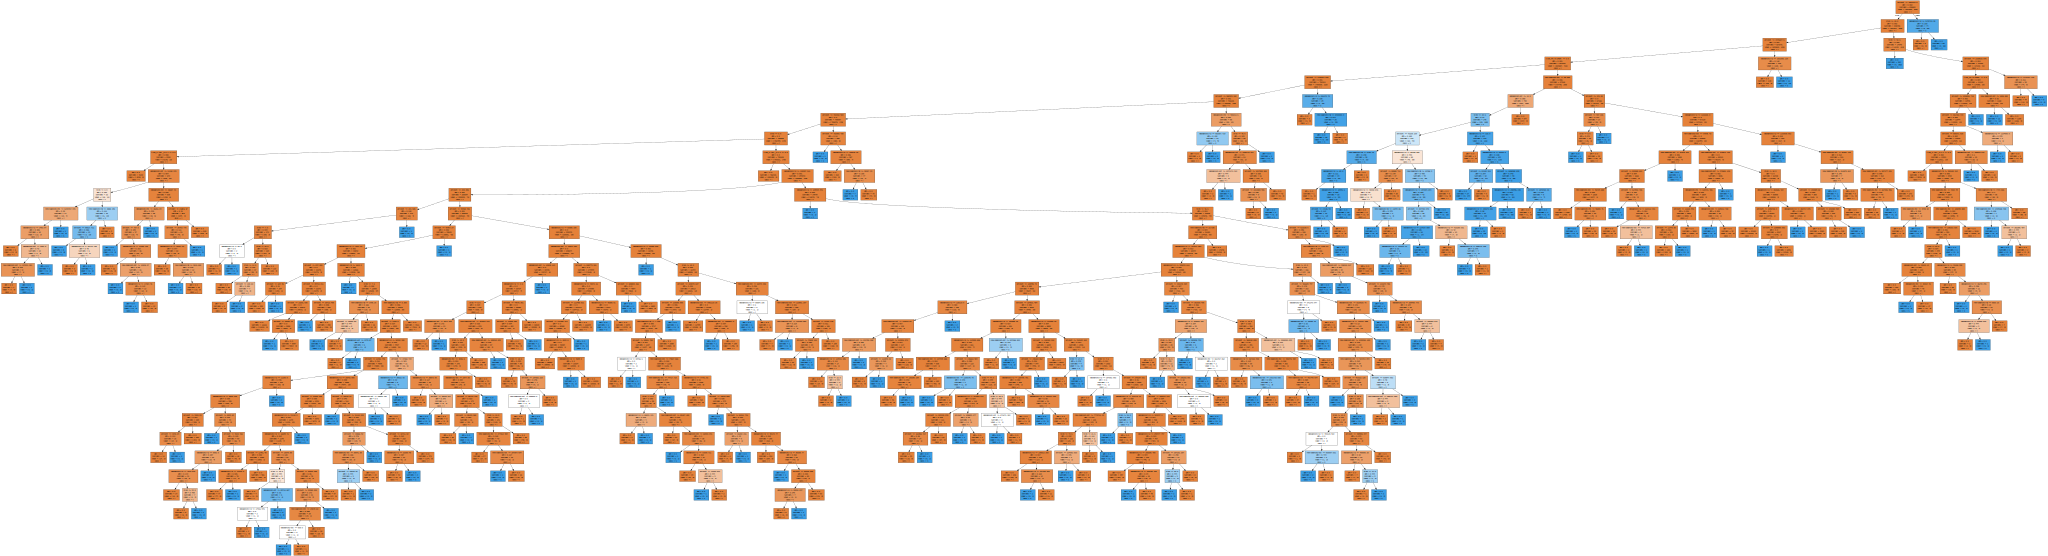

<Figure size 1100x1100 with 0 Axes>

In [62]:
#A more visual view of the way the machine learning and make the decision 
import graphviz
fig = plt.figure(figsize=(11,11))
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=features,  
                                class_names=label,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [63]:
# Calculate the accuracy of the model
accuracy = clf.score(X_test, y_test)
print("The Accuracy: {:.2f}%".format(accuracy * 100))

The Accuracy: 99.95%


In [64]:
# Calculate the error of the model
error = 1 - accuracy
print("The Error: {:.2f}%".format(error * 100))

The Error: 0.05%


In [72]:
# prediction
#features = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']]
features = np.array([[60.0, 9839.64, 170136.0, 160296.36, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0] ])
print(clf.predict(features))

[1]


# Deployment(Final Step):
The final model will be deployed in a real-time system where it will be used to identify fraudulent transactions in real-time. The system will send an alert to the relevant authorities if a transaction is suspected to be fraudulent.
# Conclusion: 
The developed model will provide a solution to the problem of fraud detection in financial transactions. The model will help financial institutions to reduce the losses incurred due to fraud and improve the overall security of the financial system.